# Consolidated Code

In [1]:
import tensorflow as tf
import cv2 as cv, os
import numpy as np
from matplotlib import pyplot as plt

#Sequential is good when we habe one input and one output; the layers below are used to build the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
cam_num = '3378'
model_ver = '9'

#configure input folder based on cam_num (fetch from training data directly)
data_folder = f'C:\\Users\\georg\\Pictures\\TrainDetector\\training_data\\{cam_num}'
#save model file directly in destination folder
destination_folder = 'C:\\Users\\georg\\Pictures\\TrainDetector\\models\\neural networks'

data = tf.keras.utils.image_dataset_from_directory(data_folder)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

scaled_data = data.map(lambda x, y: (x/255, y))

# access iterator and show next batch
scaled_iterator = scaled_data.as_numpy_iterator()
train_size = int(len(scaled_data)*.8)
val_size = int(len(scaled_data)*.2)
#test_size = int(len(scaled_data)*.1)+1

#establish partitions
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
#test = scaled_data.skip(train_size+val_size).take(test_size)

#instatiate model
model = Sequential()

# sequential adding layers, "architectural decisions..."
# add a convolutional layer (input layer), with 16 filters (to condense image), 3 by 3 pixels in size, stride of 1 (move by 1 px), 'relu' is the activation, suppressing negative values, in
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# MapPooling is reducing data be taking maximas
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Reduce channel values
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
# Reduce to one single output = 0 or 1 = train or no train
model.add(Dense(1, activation='sigmoid'))

# adam = name of optimizer
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Actual training happening here:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

# Saving the model:
file_name = f'cam{cam_num}_model_v{model_ver}.h5'
model.save(os.path.join(destination_folder, file_name))

print('DONE! ' + file_name)

Found 1467 files belonging to 2 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Epoch 1/20
36/36 [==============================] - 65s 2s/step - loss: 0.6557 - accuracy: 0.6988 - val_loss: 0.4966 - val_accuracy: 0.7326
Epoch 2/20
36/36 [==============================] - 56s 2s/step - loss: 0.2742 - accuracy: 0.9036 - val_loss: 0.1598 - val_accuracy: 0.9583
Epoch 3/20
36/36 [==============================] - 56s 2s/step - loss: 0.1602 - accuracy: 0.9505 - val_loss: 0.1805 - val_accuracy: 0.9444
Epoch 4/20
36/36 [==============================] - 49s 1s/step - loss: 0.1365 - accuracy: 0.9575 - val_loss: 0.1824 - val_accuracy: 0.9722
Epoch 5/20
36/36 [==============================] - 52s 1s/step - loss: 0.0787 - accuracy: 0.9766 - val_loss: 0.1280 - val_accuracy: 0.9792
Epoch 6/20
36/36 [==============================] - 50s 1s

In [3]:
file_name

'cam3378_model_v9.h5'

# Notepad Code

In [23]:
import tensorflow as tf
import cv2 as cv, os
import numpy as np
from matplotlib import pyplot as plt

In [24]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Configure and Load Data

In [287]:
cam_num = '268'
model_ver = '3'

In [288]:
#configure input folder based on cam_num (fetch from training data directly)
data_folder = f'C:\\Users\\georg\\Pictures\\TrainDetector\\training_data\\{cam_num}'
#save model file directly in destination folder
destination_folder = 'C:\\Users\\georg\\Pictures\\TrainDetector\\models\\neural networks'

In [289]:
data = tf.keras.utils.image_dataset_from_directory(data_folder)

Found 86 files belonging to 2 classes.


In [290]:
data_iterator = data.as_numpy_iterator()

In [291]:
batch = data_iterator.next()

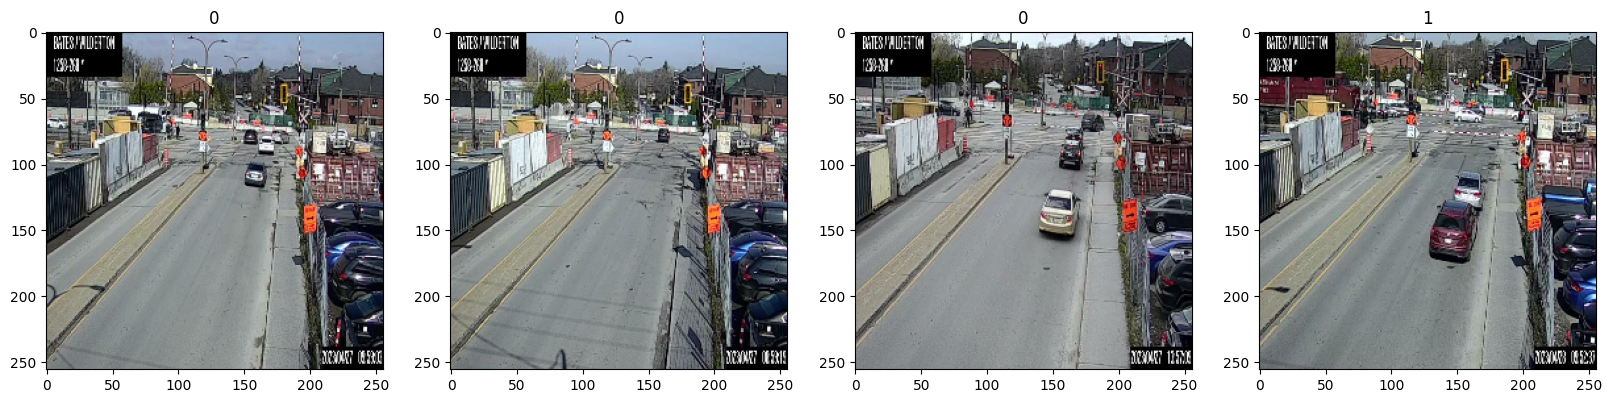

In [292]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [293]:
scaled_data = data.map(lambda x, y: (x/255, y))

In [294]:
# access iterator and show next batch
scaled_iterator = scaled_data.as_numpy_iterator()

In [295]:
train_size = int(len(scaled_data)*.7)
val_size = int(len(scaled_data)*.2)+1
test_size = int(len(scaled_data)*.1)+1

In [296]:
#establish partitions
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

# Build and train Model

In [297]:
#Sequential is good when we habe one input and one output; the layers below are used to build the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [298]:
#instatiate model
model = Sequential()

In [299]:
# sequential adding layers, "architectural decisions..."
# add a convolutional layer (input layer), with 16 filters (to condense image), 3 by 3 pixels in size, stride of 1 (move by 1 px), 'relu' is the activation, suppressing negative values, in
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# MapPooling is reducing data be taking maximas
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Reduce channel values
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
# Reduce to one single output = 0 or 1 = train or no train
model.add(Dense(1, activation='sigmoid'))

In [300]:
# adam = name of optimizer
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [301]:
logdir = 'logs'

In [302]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [303]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 6s 2s/step - loss: 1.5367 - accuracy: 0.4531 - val_loss: 0.9996 - val_accuracy: 0.6818
Epoch 2/20
2/2 [==============================] - 3s 2s/step - loss: 0.6384 - accuracy: 0.7500 - val_loss: 0.7435 - val_accuracy: 0.3636
Epoch 3/20
2/2 [==============================] - 3s 2s/step - loss: 0.7239 - accuracy: 0.4531 - val_loss: 0.5914 - val_accuracy: 0.6818
Epoch 4/20
2/2 [==============================] - 3s 2s/step - loss: 0.5509 - accuracy: 0.7188 - val_loss: 0.4473 - val_accuracy: 0.8182
Epoch 5/20
2/2 [==============================] - 3s 1s/step - loss: 0.6093 - accuracy: 0.7188 - val_loss: 0.6762 - val_accuracy: 0.6364
Epoch 6/20
2/2 [==============================] - 3s 2s/step - loss: 0.5573 - accuracy: 0.7031 - val_loss: 0.5324 - val_accuracy: 0.7273
Epoch 7/20
2/2 [==============================] - 3s 2s/step - loss: 0.5279 - accuracy: 0.7188 - val_loss: 0.4833 - val_accuracy: 0.7273
Epoch 8/20
2/2 [=========================

## Plot Performance

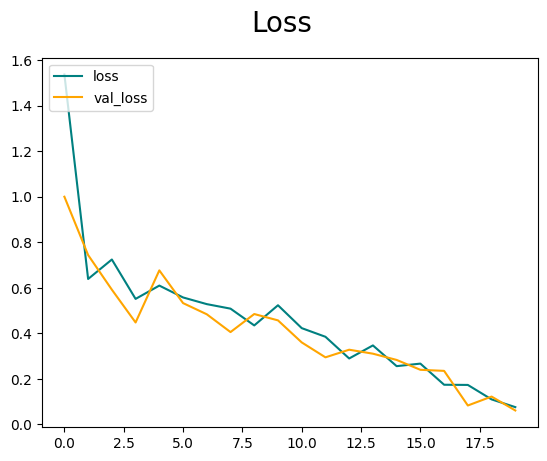

In [304]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

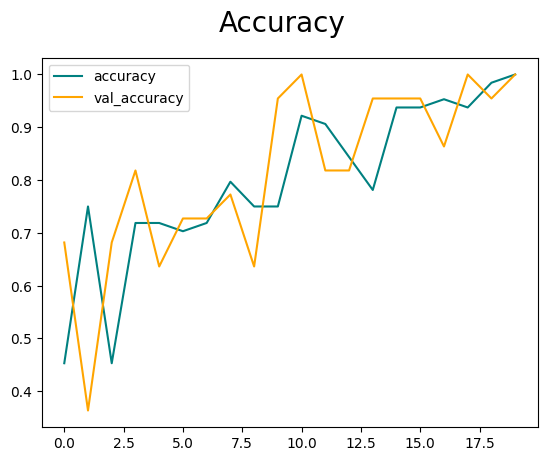

In [305]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Saving the model

In [306]:
file_name = f'cam{cam_num}_model_v{model_ver}.h5'
model.save(os.path.join(destination_folder, file_name))
file_name

'cam268_model_v3.h5'